In [107]:
# I imported libraries and read CSV files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
normal_season = pd.read_csv("Normalseason.csv", encoding="Latin1", sep=";")
playoffs_season = pd.read_csv("Playoffs.csv", encoding="Latin1", sep=";")
normal_season.info()
normal_season.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    int64  
 1   Player  735 non-null    object 
 2   Pos     735 non-null    object 
 3   Age     735 non-null    int64  
 4   Tm      735 non-null    object 
 5   G       735 non-null    int64  
 6   GS      735 non-null    int64  
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     735 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     735 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     735 non-null    float64
 17  eFG%    735 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     735 non-null    float64
 21  ORB     735 non-null    float64
 22  DR

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,0.501,0.4,1.3,0.268,2.8,5.0,0.562,0.529,0.9,1.5,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,0.459,0.5,1.9,0.277,2.6,4.9,0.528,0.497,1.0,1.7,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,0.525,0.3,1.0,0.260,2.9,5.1,0.578,0.547,0.9,1.4,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.521,0.2,0.6,0.357,7.3,13.7,0.528,0.529,4.1,5.5,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,0.411,0.8,2.7,0.294,1.5,2.8,0.523,0.483,0.5,0.7,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
5,3,Ochai Agbaji,SG,23,UTA,51,10,19.7,2.1,4.9,0.426,0.9,2.8,0.331,1.2,2.1,0.551,0.520,0.3,0.4,0.750,0.7,1.8,2.5,0.9,0.5,0.6,0.7,1.3,5.4
6,3,Ochai Agbaji,SG,23,TOR,27,18,23.6,2.7,6.8,0.391,0.6,2.6,0.217,2.1,4.3,0.496,0.432,0.8,1.3,0.611,1.4,1.9,3.3,1.3,0.7,0.6,1.1,1.9,6.7
7,4,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,0.435,1.7,5.0,0.349,2.3,4.3,0.534,0.528,0.9,1.4,0.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7
8,5,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,0.439,1.6,4.1,0.391,1.3,2.5,0.517,0.560,0.6,0.8,0.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0
9,6,Grayson Allen,SG,28,PHO,75,74,33.5,4.5,9.1,0.499,2.7,5.9,0.461,1.8,3.2,0.570,0.649,1.7,2.0,0.878,0.6,3.3,3.9,3.0,0.9,0.6,1.3,2.1,13.5


In [108]:
"""
In this table, there is a problem about player teams number in total. In NBA, there is no rule about how many times you can switch a team. But practically, players changing teams 2 times as most and that means each player can plays for 3 different teams in a season.
But in this database, I'm gonna count players last two team when I'm calculating their EFF (players efficiency). Because at the top of the database, "Precious Achiuwa" for example, has 3 rows. That means 3 teams in season and that's possible. But when you look G (game) and GS (game started), given that there is a 82 game in normal season, this player played 74, 25 and 49 matches so thats not possible.
I assume that every player who has a 3 rows, contains their last season statistics into this database. So that's why I deleted first rows who has 3 rows in this database and grouped other rows in their last teams.
"""
grouped_by_rk = normal_season.groupby("Rk")
after_row_delete = grouped_by_rk.apply(lambda x: x.iloc[1:] if len(x) > 1 else x)
normal_season = after_row_delete.reset_index(drop=True)
normal_season.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,0.459,0.5,1.9,0.277,2.6,4.9,0.528,0.497,1.0,1.7,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
1,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,0.525,0.3,1.0,0.260,2.9,5.1,0.578,0.547,0.9,1.4,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
2,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.521,0.2,0.6,0.357,7.3,13.7,0.528,0.529,4.1,5.5,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
3,3,Ochai Agbaji,SG,23,UTA,51,10,19.7,2.1,4.9,0.426,0.9,2.8,0.331,1.2,2.1,0.551,0.520,0.3,0.4,0.750,0.7,1.8,2.5,0.9,0.5,0.6,0.7,1.3,5.4
4,3,Ochai Agbaji,SG,23,TOR,27,18,23.6,2.7,6.8,0.391,0.6,2.6,0.217,2.1,4.3,0.496,0.432,0.8,1.3,0.611,1.4,1.9,3.3,1.3,0.7,0.6,1.1,1.9,6.7
5,4,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,0.435,1.7,5.0,0.349,2.3,4.3,0.534,0.528,0.9,1.4,0.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7
6,5,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,0.439,1.6,4.1,0.391,1.3,2.5,0.517,0.560,0.6,0.8,0.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0
7,6,Grayson Allen,SG,28,PHO,75,74,33.5,4.5,9.1,0.499,2.7,5.9,0.461,1.8,3.2,0.570,0.649,1.7,2.0,0.878,0.6,3.3,3.9,3.0,0.9,0.6,1.3,2.1,13.5
8,7,Jarrett Allen,C,25,CLE,77,77,31.7,6.7,10.6,0.634,0.0,0.1,0.000,6.7,10.6,0.638,0.634,3.0,4.1,0.742,3.2,7.4,10.5,2.7,0.7,1.1,1.6,1.9,16.5
9,8,Timmy Allen,SF,24,MEM,5,0,25.0,1.2,4.6,0.261,0.0,1.4,0.000,1.2,3.2,0.375,0.261,0.2,0.4,0.500,0.8,2.6,3.4,1.0,0.8,0.0,0.4,3.6,2.6


In [109]:
# Grouped players by name and last teams
players_last_teams = normal_season.groupby("Player").agg({"Tm": "last"}).reset_index()
players_last_teams.head(10)

,Player,Tm
0,A.J. Green,MIL
1,A.J. Lawson,DAL
2,AJ Griffin,ATL
3,Aaron Gordon,DEN
4,Aaron Holiday,HOU
5,Aaron Nesmith,IND
6,Aaron Wiggins,OKC
7,Adam Flagler,OKC
8,Adama Sanogo,CHI
9,Admiral Schofield,ORL


In [110]:
# I needed to filter players who played in normal season and playoffs. But when doing it, I needed to filter columns by needed to groupby with mean and sum. Only G and GS needed to summarize.
numeric_columns = normal_season.select_dtypes(include="number").columns
sum_columns = ["G", "GS"]
mean_columns = normal_season.columns[8:]

grouped_sum = normal_season.groupby("Player")[sum_columns].sum()
grouped_mean = normal_season.groupby("Player")[mean_columns].mean()
edited_normal_season = pd.concat([grouped_sum, grouped_mean], axis=1).reset_index().round(2)

# Merged players last teams with edited normal season
edited_normal_season = pd.merge(edited_normal_season, players_last_teams, on="Player")
edited_normal_season.head(10)

,Player,G,GS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Tm
0,A.J. Green,56,0,1.5,3.5,0.42,1.2,3.0,0.41,0.3,0.5,0.52,0.60,0.3,0.3,0.90,0.2,1.0,1.1,0.5,0.2,0.1,0.2,0.9,4.5,MIL
1,A.J. Lawson,42,0,1.3,2.9,0.45,0.3,1.2,0.26,1.0,1.7,0.58,0.50,0.4,0.5,0.65,0.3,0.9,1.2,0.5,0.2,0.1,0.3,0.5,3.2,DAL
2,AJ Griffin,20,0,0.9,3.1,0.29,0.5,2.0,0.26,0.4,1.2,0.35,0.37,0.1,0.1,1.00,0.1,0.8,0.9,0.3,0.1,0.1,0.4,0.3,2.4,ATL
3,Aaron Gordon,73,73,5.5,9.8,0.56,0.5,1.9,0.29,4.9,7.9,0.62,0.58,2.4,3.7,0.66,2.4,4.1,6.5,3.5,0.8,0.6,1.4,1.9,13.9,DEN
4,Aaron Holiday,78,1,2.4,5.3,0.45,1.1,2.8,0.39,1.3,2.6,0.51,0.55,0.7,0.8,0.92,0.3,1.3,1.6,1.8,0.5,0.1,0.7,1.6,6.6,HOU
5,Aaron Nesmith,72,47,4.4,8.8,0.50,1.9,4.6,0.42,2.4,4.2,0.58,0.61,1.5,1.9,0.78,0.9,2.9,3.8,1.5,0.9,0.7,0.9,3.3,12.2,IND
6,Aaron Wiggins,78,4,2.7,4.8,0.56,0.8,1.6,0.49,1.9,3.2,0.60,0.64,0.7,0.9,0.79,0.8,1.6,2.4,1.1,0.7,0.2,0.7,1.2,6.9,OKC
7,Adam Flagler,2,0,0.5,3.5,0.14,0.5,3.0,0.17,0.0,0.5,0.00,0.21,0.0,0.0,0.00,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.5,OKC
8,Adama Sanogo,9,0,1.6,3.0,0.52,0.0,0.0,0.00,1.6,3.0,0.52,0.52,0.9,1.3,0.67,2.1,1.9,4.0,0.0,0.1,0.0,0.6,0.6,4.0,CHI
9,Admiral Schofield,23,0,0.4,1.1,0.38,0.3,0.7,0.38,0.2,0.4,0.40,0.50,0.0,0.1,0.00,0.1,0.6,0.7,0.3,0.0,0.0,0.2,0.4,1.1,ORL


In [111]:
# Did the same thing for playoffs data
grouped_sum = playoffs_season.groupby("Player")[sum_columns].sum()
grouped_mean = playoffs_season.groupby("Player")[mean_columns].mean()
edited_playoffs_season = pd.concat([grouped_sum, grouped_mean], axis=1).reset_index()
edited_playoffs_season = edited_playoffs_season.round(2)

# Merged players last teams with playoffs
edited_playoffs_season = pd.merge(edited_playoffs_season, players_last_teams, on="Player")
edited_playoffs_season.head(10)

,Player,G,GS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Tm
0,A.J. Green,6,0,1.0,2.7,0.38,0.3,1.8,0.18,0.7,0.8,0.80,0.44,0.5,0.5,1.00,0.0,1.5,1.5,0.3,0.0,0.0,0.2,1.5,2.8,MIL
1,A.J. Lawson,7,0,0.4,0.9,0.50,0.3,0.7,0.40,0.1,0.1,1.00,0.67,0.0,0.0,0.00,0.1,0.3,0.4,0.0,0.0,0.1,0.0,0.1,1.1,DAL
2,Aaron Gordon,12,12,5.8,9.8,0.58,0.9,2.3,0.41,4.8,7.6,0.64,0.63,1.9,2.3,0.82,3.0,4.3,7.3,4.4,0.8,0.6,1.5,2.3,14.3,DEN
3,Aaron Nesmith,14,14,3.7,8.5,0.44,1.4,4.9,0.29,2.3,3.6,0.63,0.52,1.9,2.1,0.93,1.3,3.7,5.0,2.2,0.6,0.6,1.4,4.0,10.8,IND
4,Aaron Wiggins,10,0,2.3,4.7,0.49,0.6,2.0,0.30,1.7,2.7,0.63,0.55,1.0,1.1,0.91,0.9,2.3,3.2,1.0,0.6,0.3,0.9,0.8,6.2,OKC
5,Al Horford,11,7,3.6,8.1,0.45,1.7,5.6,0.31,1.9,2.5,0.78,0.56,0.4,0.6,0.57,1.9,5.3,7.2,2.0,0.5,0.8,0.6,1.4,9.4,BOS
6,Alec Burks,6,0,4.2,8.3,0.50,2.0,4.7,0.43,2.2,3.7,0.59,0.62,4.5,5.3,0.84,0.7,2.7,3.3,1.0,0.2,0.2,0.0,1.0,14.8,NYK
7,Amir Coffey,6,3,1.2,3.7,0.32,0.5,1.8,0.27,0.7,1.8,0.36,0.39,0.0,0.0,0.00,0.3,1.3,1.7,0.3,0.3,0.2,0.8,1.0,2.8,LAC
8,Andre Jackson Jr.,5,0,1.0,2.2,0.46,0.4,1.2,0.33,0.6,1.0,0.60,0.55,0.0,0.0,0.00,1.0,1.2,2.2,2.0,1.0,0.2,0.6,2.0,2.4,MIL
9,Andrew Nembhard,14,14,5.3,9.4,0.56,1.5,3.1,0.49,3.8,6.3,0.60,0.64,0.9,1.2,0.71,0.8,2.4,3.1,5.0,0.3,0.2,1.2,3.4,12.9,IND


In [112]:
# For now, to finish first research of my project, I need to calculate players EFF for normal season. Later, I'm gonna compare playoffs EFF between normal season EFF. But for now I'm gonna continue with only normal season.
edited_normal_season["EFF"] = (edited_normal_season["PTS"] + edited_normal_season["TRB"] + edited_normal_season["AST"] + edited_normal_season["STL"] + edited_normal_season["BLK"]) - (edited_normal_season["FGA"] - edited_normal_season["FG"] + edited_normal_season["FTA"] - edited_normal_season["FT"] + edited_normal_season["TOV"] + edited_normal_season["PF"])
eff_n = edited_normal_season[["Player", "EFF", "Tm"]].sort_values(by="EFF", ascending=False)
eff_n

,Player,EFF,Tm
434,Nikola Joki?,36.1,DEN
284,Joel Embiid,35.8,PHI
373,Luka Don?i?,34.7,DAL
184,Giannis Antetokounmpo,33.4,MIL
28,Anthony Davis,31.1,LAL
...,...,...,...
16,Alondes Williams,-0.5,MIA
309,Joshua Primo,-1.0,LAC
481,Ron Harper Jr.,-1.0,TOR
234,Jalen Crutcher,-1.0,NOP


In [113]:
# I think best way to group them by EFF is using IQR on some point. eff_n.mean = 8.36 | mode = 3 | max = 36,1 | min = -3
# So I'm gonna calculate IQR and then check that which labels would be fit for this. (data < q1 - 1.5 * IQR | data > q3 + 1.5 * IQR)
from scipy.stats import iqr
iqr_value = iqr(eff_n["EFF"])
lower_treshold = np.quantile(eff_n["EFF"], 0.25) - 1.5 * iqr_value
upper_treshold = np.quantile(eff_n["EFF"], 0.75) + 1.5 * iqr_value
between = (eff_n["EFF"] < lower_treshold) | (eff_n["EFF"] > upper_treshold)
eff_n[between]

# +25 EFF is so rare as I see. So I'm gonna set labels from 10 by 5.
bins = [5, 10, 15, 20, 25, 30, np.inf]
labels = ["5-10", "10-15", "15-20", "20-25", "25-30", "30+"]
eff_n["Category"] = pd.cut(eff_n["EFF"], labels=labels, bins=bins)
eff_n

,Player,EFF,Tm,Category
434,Nikola Joki?,36.1,DEN,30+
284,Joel Embiid,35.8,PHI,30+
373,Luka Don?i?,34.7,DAL,30+
184,Giannis Antetokounmpo,33.4,MIL,30+
28,Anthony Davis,31.1,LAL,30+
...,...,...,...,...
16,Alondes Williams,-0.5,MIA,NaN
309,Joshua Primo,-1.0,LAC,NaN
481,Ron Harper Jr.,-1.0,TOR,NaN
234,Jalen Crutcher,-1.0,NOP,NaN


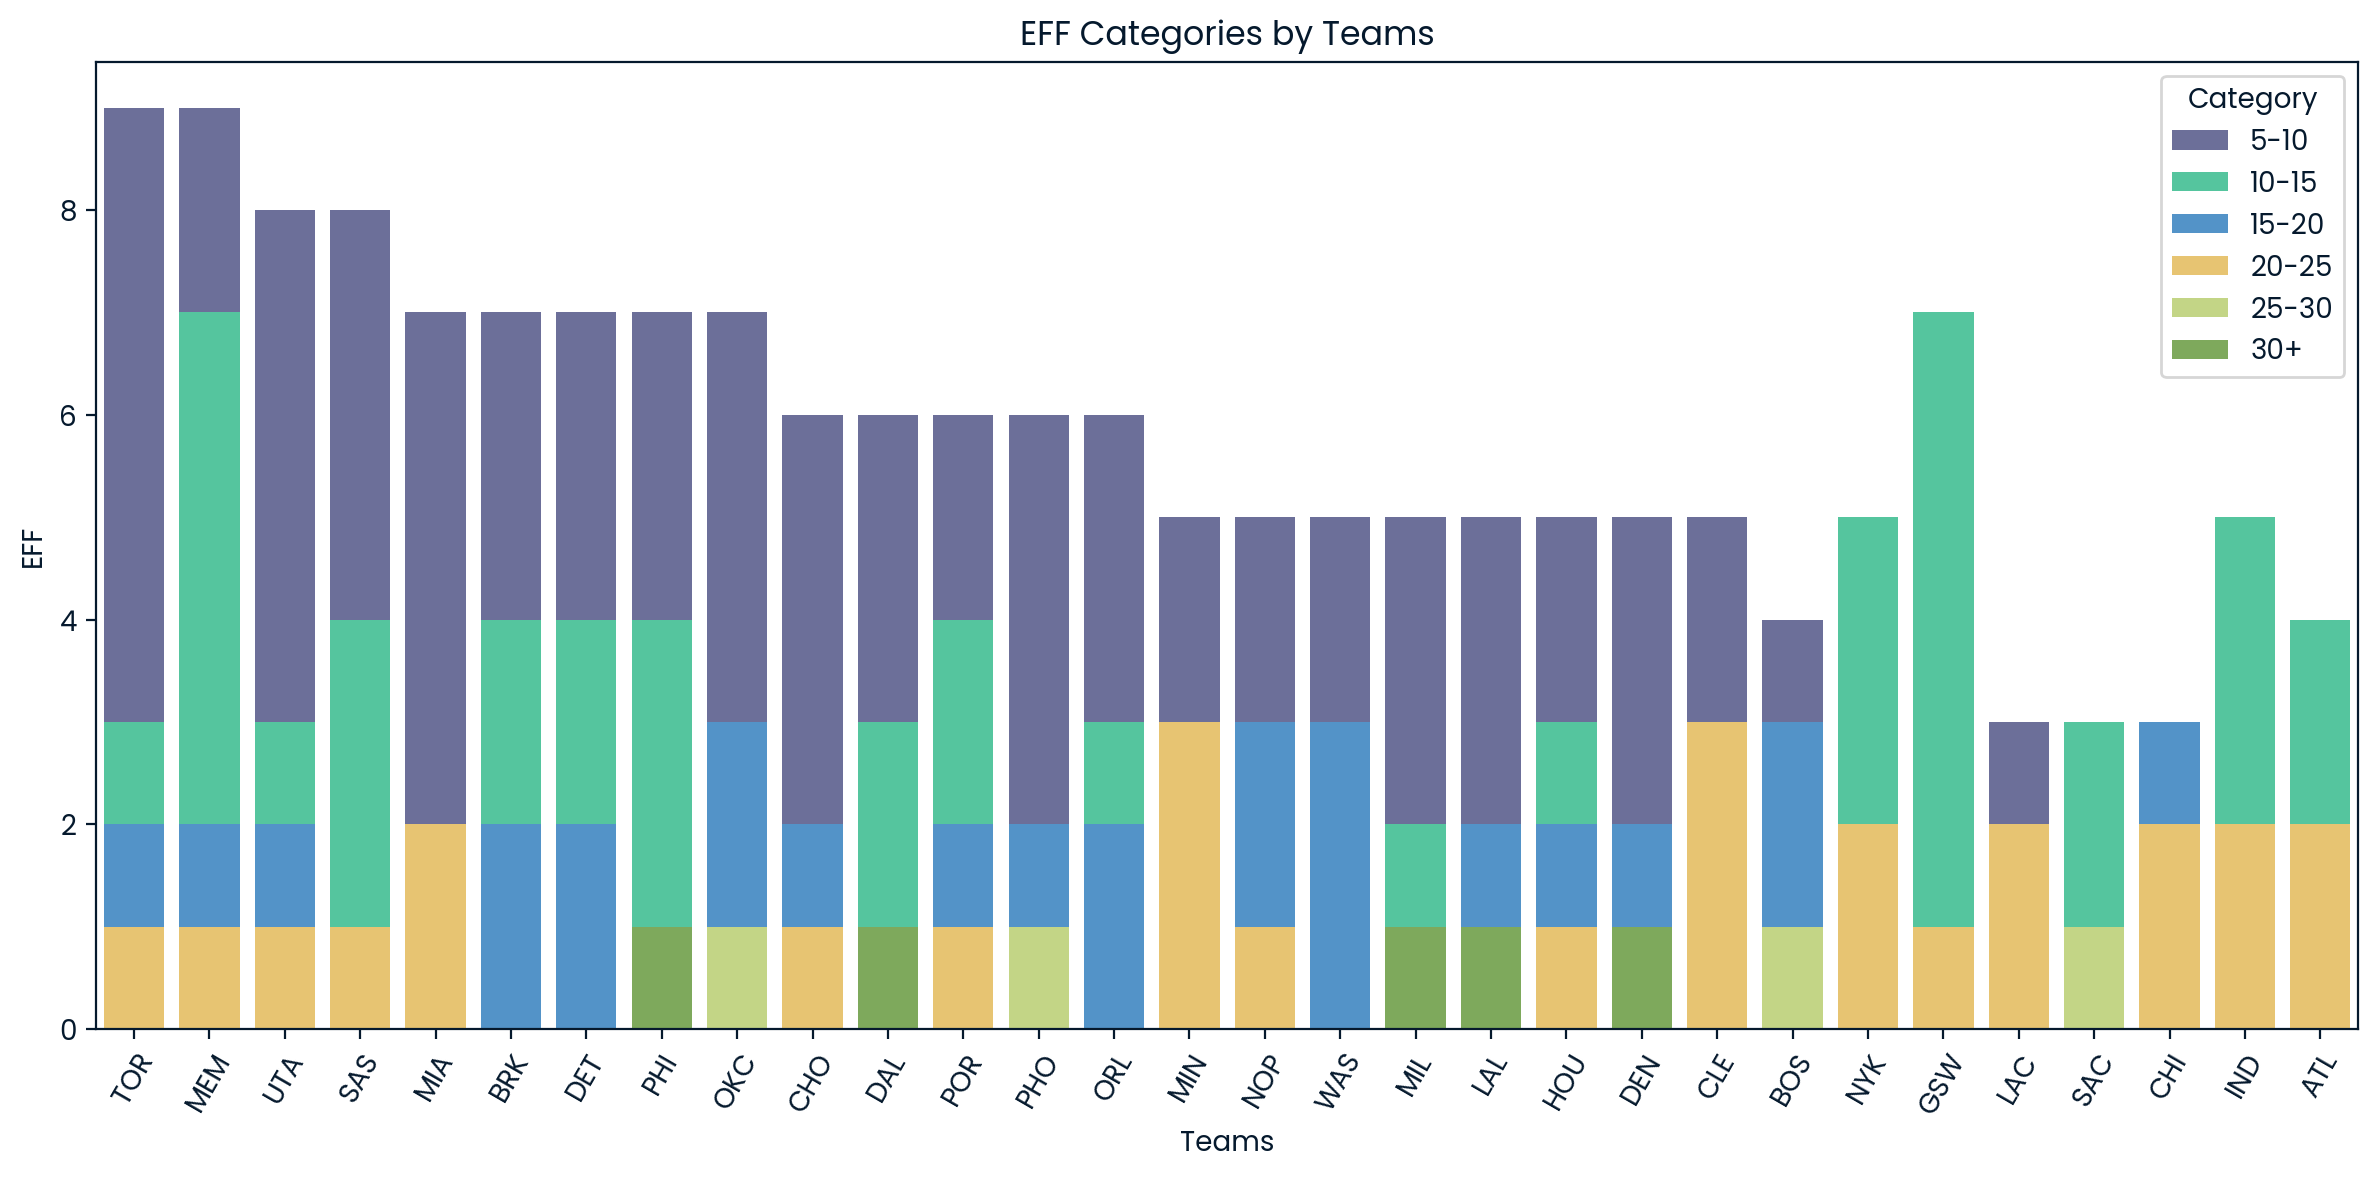

In [114]:
# Time to see player distribution by team
team_order = eff_n[eff_n["Category"] == "5-10"].groupby("Tm").size().sort_values(ascending=False).index

plt.figure(figsize=(12, 6))
sns.countplot(data=eff_n, x="Tm", hue="Category", dodge=False, order=team_order)

plt.xlabel("Teams")
plt.ylabel("EFF")
plt.title("EFF Categories by Teams")

plt.xticks(rotation=60)
plt.tight_layout()